In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [2]:
files = glob.glob('../Output/BASE/*.csv')
files.sort()

In [3]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/BASE/BreastC Silhouette.csv',
 1: '../Output/BASE/BreastC acc.csv',
 2: '../Output/BASE/BreastC adjMI.csv',
 3: '../Output/BASE/BreastC cluster GMM.csv',
 4: '../Output/BASE/BreastC cluster Kmeans.csv',
 5: '../Output/BASE/BreastC2D.csv',
 6: '../Output/BASE/Faults Silhouette.csv',
 7: '../Output/BASE/Faults acc.csv',
 8: '../Output/BASE/Faults adjMI.csv',
 9: '../Output/BASE/Faults cluster GMM.csv',
 10: '../Output/BASE/Faults cluster Kmeans.csv',
 11: '../Output/BASE/Faults2D.csv',
 12: '../Output/BASE/SSE.csv',
 13: '../Output/BASE/logliklihood.csv'}

In [4]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[12]**

GMM Loglikelihood - Both datasets:  **dfs[13]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

NN GMM cluster - BreastC:  **dfs[3]**

NN Kmeans cluster - BreastC:  **dfs[4]**

Visualize dataset in 2D - Breast C:  **dfs[5]**

Silhouette - Faults:  **dfs[6]** 

acc - Faults:  **dfs[7]**

adjMI - Faults:  **dfs[8]**

NN GMM cluster - Faults:  **dfs[9]**

NN Kmeans cluster - Faults:  **dfs[10]**

Visualize dataset in 2D - Faults:  **dfs[11]**

In [5]:
km_SSE = dfs[12]
gmm_log = dfs[13]
bc_ss = dfs[0].T[1:]
bc_acc = dfs[1].T[1:]
bc_adjMI = dfs[2].T[1:]
bc_nn_gmm = dfs[3]
bc_nn_km = dfs[4]
bc_2d = dfs[5]
f_ss = dfs[6].T[1:]
f_acc = dfs[7].T[1:]
f_adjMI = dfs[8].T[1:]
f_nn_gmm = dfs[9]
f_nn_km = dfs[10]
f_2d = dfs[11]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [6]:
km_SSE.columns = ['clusters','bc_sse','fp_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
f_y = km_SSE['fp_sse']
km_SSE.head()

,clusters,bc_sse,fp_sse
0,2,9141.635757,31346.971150
1,3,7919.072251,27817.604402
2,4,7272.895476,25812.500775
3,5,6685.327054,22198.737246
4,6,6264.173111,20760.267722


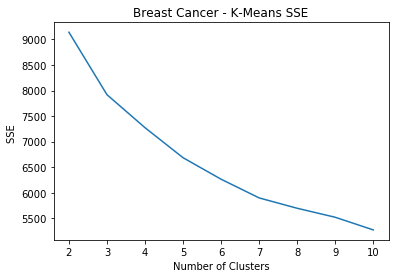

In [7]:
plt.plot(x,bc_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - K-Means SSE')
plt.show()

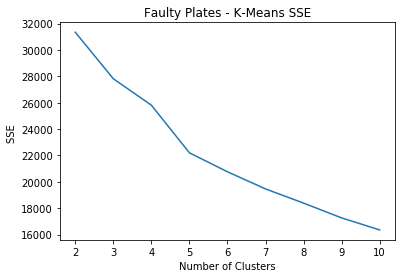

In [8]:
plt.plot(x,f_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [9]:
gmm_log.columns = ['clusters','bc_log','fp_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
f_y = gmm_log['fp_log']
gmm_log.head()

,clusters,bc_log,fp_log
0,2,0.632389,8.988949
1,3,3.053271,16.527466
2,4,5.495579,18.752087
3,5,9.659070,19.517833
4,6,11.405639,20.010059


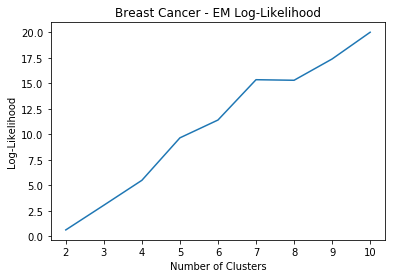

In [10]:
plt.plot(x,bc_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - EM Log-Likelihood')
plt.show()

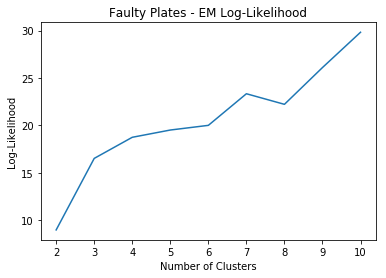

In [11]:
plt.plot(x,f_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [12]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.319758,0.346357,2
3,0.293224,0.319629,3
4,0.146783,0.290478,4
5,0.135201,0.168952,5
6,0.156291,0.16732,6


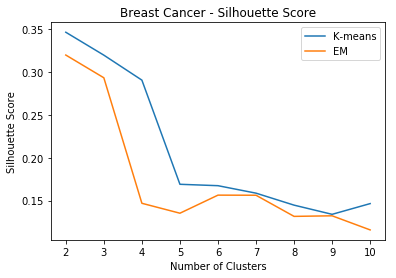

In [13]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [14]:
bc_acc['clusters'] = bc_acc.index
bc_acc.columns = ['gmm_acc','km_acc','clusters']
x = bc_acc['clusters']
gmm_y = bc_acc['gmm_acc']
km_y = bc_acc['km_acc']
bc_acc.head()

,gmm_acc,km_acc,clusters
2,0.925275,0.912088,2
3,0.918681,0.887912,3
4,0.903297,0.905495,4
5,0.951648,0.925275,5
6,0.947253,0.942857,6


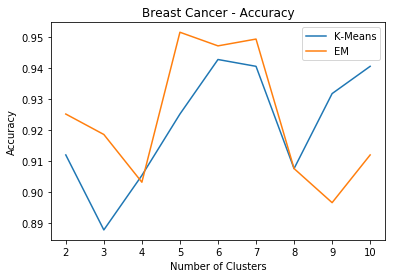

In [15]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [16]:
bc_adjMI['clusters'] = bc_adjMI.index
bc_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_adjMI['gmm_adjMI']
km_y = bc_adjMI['km_adjMI']

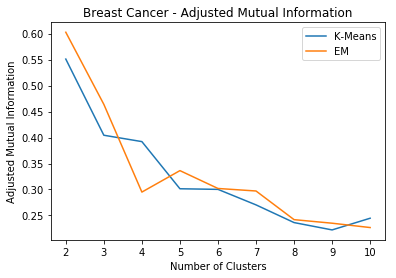

In [17]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Adjusted Mutual Information')
plt.legend()
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [18]:
f_ss['clusters'] = bc_ss.index
f_ss.columns = ['gmm_ss','km_ss','clusters']
x = f_ss['clusters']
gmm_y = f_ss['gmm_ss']
km_y = f_ss['km_ss']
f_ss.head()

,gmm_ss,km_ss,clusters
2,0.260074,0.306774,2
3,0.175784,0.188895,3
4,0.163164,0.179507,4
5,0.166295,0.183071,5
6,0.174775,0.189318,6


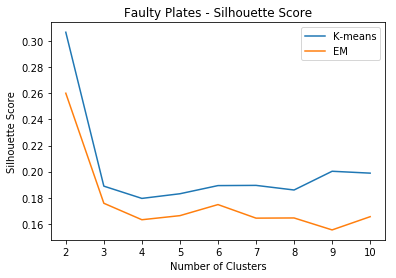

In [19]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [20]:
f_acc['clusters'] = f_acc.index
f_acc.columns = ['gmm_acc','km_acc','clusters']
x = f_acc['clusters']
gmm_y = f_acc['gmm_acc']
km_y = f_acc['km_acc']
f_acc.head()

,gmm_acc,km_acc,clusters
2,0.462629,0.493557,2
3,0.49549,0.498711,3
4,0.513531,0.537371,4
5,0.513531,0.538015,5
6,0.505155,0.524485,6


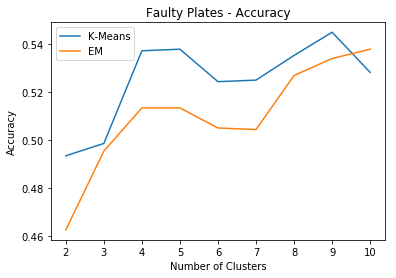

In [21]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [22]:
f_adjMI['clusters'] = f_adjMI.index
f_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = f_adjMI['clusters']
gmm_y = f_adjMI['gmm_adjMI']
km_y = f_adjMI['km_adjMI']

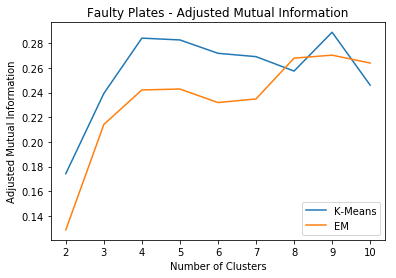

In [23]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates - Adjusted Mutual Information')
plt.legend()
plt.show()

## Part 5: Clustering and Neural Network

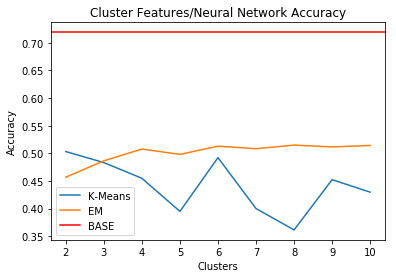

In [24]:
names = ["K-Means", "EM"]
files1 = [f_nn_km, f_nn_gmm]
files_d = dict(enumerate(files1))

for indx, f in files_d.items():
    plt.plot(f.iloc[:,7], f['mean_test_score'], label = names[indx])
plt.axhline(y=0.719, label = "BASE", color = "red")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Clusters")
plt.title('Cluster Features/Neural Network Accuracy')
plt.show()

In [25]:
f_nn_km

,Unnamed: 0,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_NN__alpha,param_NN__hidden_layer_sizes,param_km__n_clusters,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0,0.065226,0.001226,0.503222,0.491625,0.001,"(14,)",2,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",1,0.510597,0.479187,0.498069,0.509671,0.500971,0.486017,0.002697,0.000237,0.005360,0.013062
1,1,0.093068,0.001009,0.483247,0.493817,0.001,"(14,)",3,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",3,0.443160,0.437561,0.505792,0.504836,0.500971,0.539055,0.009424,0.000027,0.028483,0.042161
2,2,0.091760,0.000979,0.454897,0.451916,0.001,"(14,)",4,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",4,0.448940,0.448209,0.378378,0.372340,0.537864,0.535198,0.008001,0.000027,0.065194,0.066538
3,3,0.096535,0.001052,0.394974,0.398687,0.001,"(14,)",5,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",8,0.211946,0.219748,0.469112,0.478723,0.504854,0.497589,0.005473,0.000066,0.130550,0.126763
4,4,0.140909,0.000980,0.492268,0.492271,0.001,"(14,)",6,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",2,0.479769,0.492740,0.492278,0.494197,0.504854,0.489875,0.018994,0.000002,0.010238,0.001796
5,5,0.119022,0.001057,0.400129,0.398411,0.001,"(14,)",7,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",7,0.348748,0.351404,0.349421,0.350097,0.502913,0.493732,0.002540,0.000106,0.072434,0.067404
6,6,0.142712,0.000992,0.361469,0.371539,0.001,"(14,)",8,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",9,0.348748,0.350436,0.482625,0.485493,0.252427,0.278689,0.025578,0.000009,0.094334,0.085736
7,7,0.170054,0.001427,0.452320,0.451325,0.001,"(14,)",9,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",5,0.497110,0.505324,0.349421,0.350097,0.510680,0.498554,0.014103,0.000502,0.073041,0.071632
8,8,0.157399,0.001018,0.429768,0.434892,0.001,"(14,)",10,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",6,0.475915,0.474347,0.349421,0.350097,0.464078,0.480231,0.010442,0.000019,0.057074,0.060007
